In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:

df = pd.read_csv('../outputs.ath/rarefy/explain.SRR5241537.k31.csv')
#df = pd.read_csv('../outputs.ath/rarefy/explain.SRR12795785.k31.csv')



#df = df[df['metag'] == 'ERR3211919']

In [3]:
df

,iteration,position,cumulative,metag
0,0,0,0.434087,SRR5241537
1,0,100,0.435631,SRR5241537
2,0,200,0.435905,SRR5241537
3,0,300,0.436095,SRR5241537
4,0,400,0.436616,SRR5241537
...,...,...,...,...
1145,9,11000,0.471213,SRR5241537
1146,9,11100,0.471857,SRR5241537
1147,9,11200,0.471997,SRR5241537
1148,9,11300,0.472067,SRR5241537


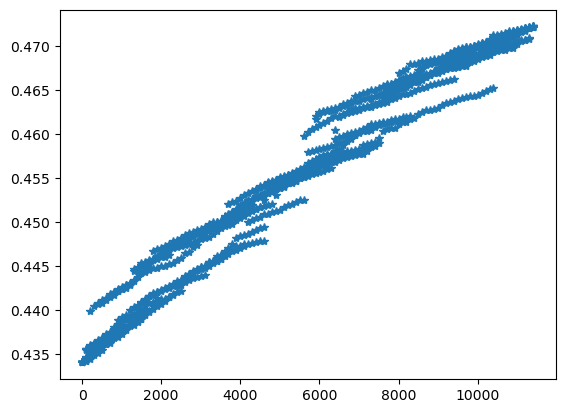

In [4]:
plt.plot(df.position, df.cumulative, '*')

In [5]:
df = df.sort_values(by=["iteration", "position"])

# Group by iteration and calculate cumulative kmers per sample position
#df["cumulative"] = df.groupby("iteration")["cumulative"]

# Calculate mean and std across iterations at each sample position
summary = df.groupby("position")["cumulative"].agg(["mean", "std"]).reset_index()
summary

,position,mean,std
0,0,0.434088,0.000003
1,100,0.434789,0.000566
2,200,0.435691,0.001588
3,300,0.436129,0.001596
4,400,0.436931,0.002073
...,...,...,...
110,11000,0.471259,0.000589
111,11100,0.471560,0.000497
112,11200,0.471677,0.000517
113,11300,0.471849,0.000522


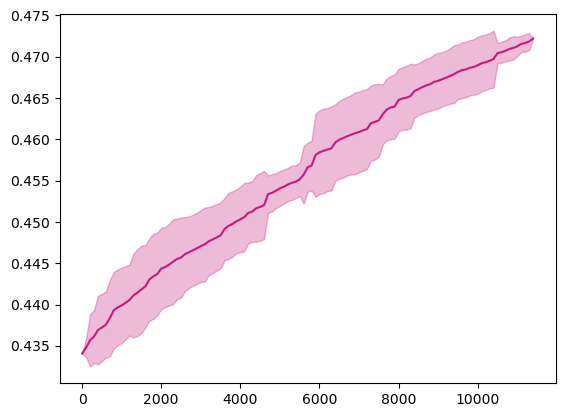

In [6]:
x_kmer = summary["position"]
mean_kmer = summary["mean"]
std_kmer = summary["std"]

plt.plot(x_kmer, mean_kmer, color="#c51b7d", label="Mean cumulative k-mers")
plt.fill_between(x_kmer, mean_kmer-2*std_kmer, mean_kmer+2*std_kmer, alpha=0.3, color="#c51b7d")
#plt.ylim(0, 1)

In [7]:
df

,iteration,position,cumulative,metag
0,0,0,0.434087,SRR5241537
1,0,100,0.435631,SRR5241537
2,0,200,0.435905,SRR5241537
3,0,300,0.436095,SRR5241537
4,0,400,0.436616,SRR5241537
...,...,...,...,...
1145,9,11000,0.471213,SRR5241537
1146,9,11100,0.471857,SRR5241537
1147,9,11200,0.471997,SRR5241537
1148,9,11300,0.472067,SRR5241537


In [8]:
summary

,position,mean,std
0,0,0.434088,0.000003
1,100,0.434789,0.000566
2,200,0.435691,0.001588
3,300,0.436129,0.001596
4,400,0.436931,0.002073
...,...,...,...
110,11000,0.471259,0.000589
111,11100,0.471560,0.000497
112,11200,0.471677,0.000517
113,11300,0.471849,0.000522


In [9]:
mmax = max(summary["mean"])

In [10]:
mmin = min(summary["mean"])

In [11]:
mmax - mmin

0.03812329999999997